In [115]:
!pip install PIL

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

from bs4 import BeautifulSoup

import pandas as pd
import time

In [39]:
s = Service("C:/Users/elzzh/GitLocal/rapidhack/Python/chromedriver.exe")
driver = webdriver.Chrome(service = s) # <-- You will be using this variable alot, moving forward

In [40]:
url = "https://www.tripadvisor.com.sg/Attraction_Review-g298570-d10533919-Reviews-RapidKL_Bus-Kuala_Lumpur_Wilayah_Persekutuan.html"
driver.get(url)

In [41]:
see_more_button = driver.find_element(By.XPATH, "/html/body/div[1]/main/div[1]/div[1]/div[2]/div[2]/div/div[1]/section[8]/div/div/div/section/section/div[1]/div/div[5]/div/button")
see_more_button.click()

In [47]:
page_source = driver.page_source
soup_5 = BeautifulSoup(page_source)

In [80]:
reviews_1 = soup_1.find_all("div", class_="_c")[2:]
reviews_2 = soup_2.find_all("div", class_="_c")[2:]
reviews_3 = soup_3.find_all("div", class_="_c")[2:]
reviews_4 = soup_4.find_all("div", class_="_c")[2:]
reviews_5 = soup_5.find_all("div", class_="_c")[2:]

reviews = reviews_1 + reviews_2 + reviews_3 + reviews_4 + reviews_5

print(len(reviews_1))
print(len(reviews_2))
print(len(reviews_3))
print(len(reviews_4))
print(len(reviews_5))
print(len(reviews))

10
10
10
10
3
43


In [81]:
rev_list = []

for rev in reviews:
    rev_dict = {}
    rev_dict['name'] = rev.find("span", class_="biGQs _P fiohW fOtGX").text #name
    rev_dict['title'] = rev.find("span", class_="yCeTE").text #title
    rev_dict['details'] = rev.find("div", class_="RpeCd").text #details
    rev_dict['reviews'] = rev.find("span", class_="JguWG").text #reviews

    rev_list.append(rev_dict)

In [84]:
rev_df = pd.DataFrame(rev_list)
rev_df.head()

,name,title,details,reviews
0,Wong M,Terrible Bad Experience Rain Season,Aug 2023 • Solo,"Bad service,during raining season don't open t..."
1,Travel37332911184,I've waited for so long!,Jul 2023 • Solo,They skipped the bus rotation that I have to r...
2,John doe,Waited for 1 hour and more there is still no bus.,Jul 2023 • Solo,Very bad customer service. Already email and c...
3,IannAR,Stupid management asking people to wear mask.,Jun 2023 • Solo,Stupid management. Still asking passengers to ...
4,Wenghoa Flower Boutique,Malaysia’s worst bus service,May 2023 • Solo,Worst bus service of my life. The bus drivers ...


In [89]:
long_str = ''

for review in rev_df['reviews']:
    review = review.lower()
    long_str = long_str + ' ' + review

print(long_str)

 bad service,during raining season don't open the door for us to sit inside. did knocked the door but the driver wearing headphones, and even so if he heard he purposely not hearing the knock.terrible rapidkl service, please educate your driver to be more friendly. they skipped the bus rotation that i have to ride or else i'll late for work. waited for over an hour under a hot sun, contacted the management regarding the issue and still no actions made. very bad customer service. already email and complaint about the services but there is no action taken and email reply. stupid management. still asking passengers to wear mask even it’s not relevant anymore. what the hell your management are thinking? worst bus service of my life. the bus drivers are so freaking rude they doesn’t stop even after seeing you and if they stop they will stop little far so that till the time you reach the door they start the bus. always better to take a grab rather than this worst bus service under the hot we

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

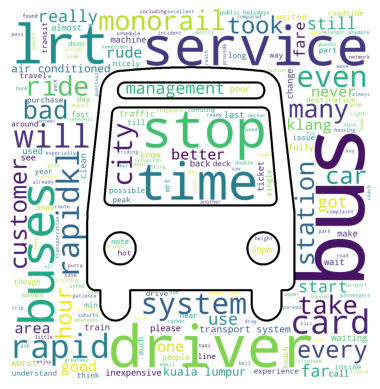

In [138]:
stopwords = list(STOPWORDS)

python_mask = np.array(Image.open('asset/Rapid_KL_6.png'))

wc = WordCloud(
    background_color='white',
    stopwords=stopwords,
    mask=python_mask,
    contour_color="black",
    contour_width=10,
    max_font_size=300,
    max_words=200,
    min_word_length=3
)

wc.generate(long_str)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [139]:
wc.to_file("WordCloud.png")